In [1]:
%load_ext autoreload
%autoreload 2

from readers import *
from datalib import *
import config.config_jump_detection as config

import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as optimization
from bisect import bisect
import time as t

%matplotlib notebook

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
start_time = t.time()
print("Reading demonstration data")

data = []

starting_indices = []
ending_indices = []

for i in range(len(config.demos)):
    demo = config.demos[i]
    print(f'Reading demonstration file {demo}')

    data.append(DataSet())

    # Read data
    franka_reader = FrankaStateReader(demo)
    
    while not franka_reader.end():
        dp = franka_reader.next_datapoint()
        time = dp.time
        franka_state = dp.value
        
        value = franka_state.tau_measured[1] - franka_state.tau_desired[1]
        
        data[i].append(DataPoint(time, value))
        
    # Align time
    data[i].align_time()

print("--- %s seconds ---" % (t.time() - start_time))
print("Done")

Reading demonstration data
Reading demonstration file data/demo3.2.bag
--- 5.715566396713257 seconds ---
Done


<IPython.core.display.Javascript object>


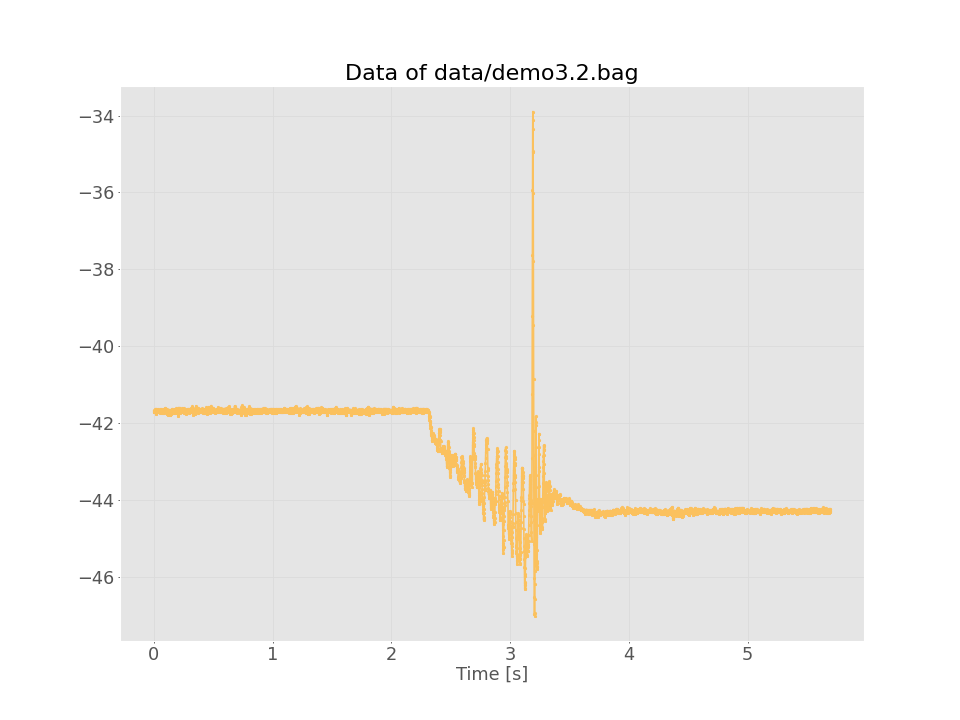

In [3]:
# Plot data

for i in range(len(config.demos)):
    plt.figure(figsize=config.figsize,dpi=config.dpi)
    plt.rcParams['xtick.labelsize'] = config.fontsize2
    plt.rcParams['ytick.labelsize'] = config.fontsize2

    plt.plot(data[i].time, data[i].value, f'C{4}-*', linewidth=config.linewidth, markersize=config.markersize3)
    plt.xlabel('Time [s]',fontsize=config.fontsize2)
#     plt.ylabel('Velocity [m/s]',fontsize=config.fontsize2)
    plt.title('Data of ' + config.demos[i],fontsize=config.fontsize1)
#     if config.xlim is not None:
#         x_min = impact_phase_velocity_data[i][0].time + config.xlim[0]
#         x_max = impact_phase_velocity_data[i][-1].time + config.xlim[-1]
#         sub_ydata = velocity_data[i][bisect(velocity_data[i].time, x_min):bisect(velocity_data[i].time, x_max)].get_index(j).value
#         plt.xlim((x_min, x_max))
#         plt.ylim((min(sub_ydata) - 0.05, max(sub_ydata) + 0.05))